# B-Tree
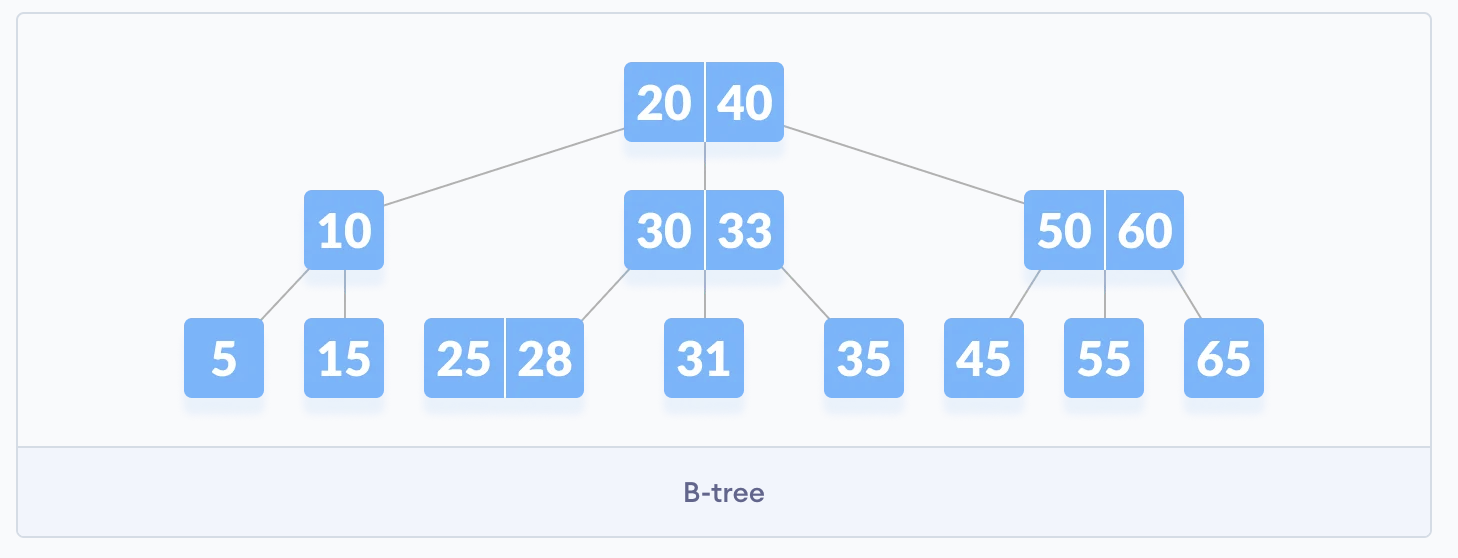

## Properties:
- special type of self-balancing BST where each node can contain more than one key and have more than two children
- also known as a height balanced m-way tree
- with BSTs, AVL trees, Red-black trees, there can only be one key per node, so with large amounts of keys, the tree becomes very tall, increasing access time.... B-trees help reduce the height

- for each node x, the keys are stored in increasing order
- in each node there is a boolean value that is true if x is a leaf
- if n is the order of the tree, each internal node can contain at most n-1 keys along with a pointer to each child
- each node except root can have at most n children and at least n/2 children
- all leaves have same depth (height of tree)
- root has at least two children and contains minumum of 1 key
- if n >= 1 for any n-key b-tree of height h and minimum degree t >= 2, height >= log base t (n+1)/2

- likewise ensures worst and avg case time complexity for search is O(log(N))

## Simple Implementation:

In [6]:
# same as regular TreeNode, but has lists to represent keys and children as well as boolean to indicate if leaf

class BNode:
    def __init__(self, leaf=False):
        self.leaf = leaf
        self.keys = []
        self.child = []
    

In [35]:
class BTree:
    def __init__(self, t):
        self.root = BNode(True)
        self.t = t
    
    def print_tree(self, x, l=0):
        print('Level ', l, ' ', len(x.keys), end=':')
        for i in x.keys:
            print(i, end=' ')
        print()
        l += 1
        if len(x.child) > 0:
            for i in x.child:
                self.print_tree(i, l)
    
    def search_key(self, k, x=None):
        if x is not None:
            i = 0
            while i < len(x.keys) and k > x.keys[i][0]:
                i+=1
            if i < len(x.keys) and k == x.keys[i][0]:
                return(x, i)
            elif x.leaf:
                return None
            else:
                return self.search_key(k, x.child[i])
        else:
            return self.search_key(k, self.root)
    
    def insert_key(self, k):
        root = self.root
        if len(root.keys) == (2 * self.t) - 1:
            temp = BNode()
            self.root = temp
            temp.child.append(root)
            self.split(temp, 0)
            self.insert_non_full(temp, k)
        else:
            self.insert_non_full(root, k)
    
    def insert_non_full(self, x, k):
        i = len(x.keys)-1
        if x.leaf:
            x.keys.append((None, None))
            while i >= 0 and k[0] < x.keys[i][0]:
                x.keys[i+1] = x.keys[i]
                i -= 1
            x.keys[i+1] = k
        else:
            while i >= 0 and k[0] < x.keys[i][0]:
                i -= 1
            i += 1
            if len(x.child[i].keys) == (2 * self.t) - 1:
                self.split(x, i)
                if k[0] > x.keys[i][0]:
                    i += 1
            self.insert_non_full(x.child[i], k)
            
    def split(self, x, i):
        t = self.t
        y = x.child[i]
        z = BNode(y.leaf)
        x.child.append(z)
        x.keys.append(y.keys[t-1])
        z.keys = y.keys[t: (2 * t) - 1]
        y.keys = y.keys[0: t - 1]
        if not y.leaf:
            z.child = y.child[t: 2 * t]
            y.child = y.child[0: t - 1]

In [36]:
def main():
    B = BTree(3)

    for i in range(10):
        B.insert_key((i, 2 * i))

    B.print_tree(B.root)

    if B.search_key(8) is not None:
        print("\nFound")
    else:
        print("\nNot found")

In [37]:
main()

Level  0   2:(2, 4) (5, 10) 
Level  1   2:(0, 0) (1, 2) 
Level  1   2:(3, 6) (4, 8) 
Level  1   4:(6, 12) (7, 14) (8, 16) (9, 18) 

Found
